# First look at `rootpy`

(**note** a lot of this tutorial draws comparisons with the pyROOT tutorial in this same repository, This notebook follows very closely the same steps done in the pyROOT firstLook notebook)

The [rootpy](http://www.rootpy.org/) homepage describes itself as:

```
The rootpy project is a community-driven initiative aiming to provide a more pythonic interface with ROOT on top of the existing PyROOT bindings. Given Python’s reflective and dynamic nature, rootpy also aims to improve ROOT design flaws and supplement existing ROOT functionality. 
```

The first thing we'll do is load a file via XRootD. The pyROOT code to load a file is
```python
import ROOT as r
firstLookFile = r.TFile.Open("root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root")
```

In this snippet, `ROOT`, `TFile` and `TFile.Open` are direct mappings to the underlying ROOT libraries. In `pyROOT`, you have to explicitly burrow down through the `ROOT` object system.

By comparison, the `rootpy` library makes user code more pythonic. It provides a lot of easy interfaces to simplify regular operations. The `pyROOT` code from before can be implemented as the following with `pyroot`:

In [16]:
from rootpy.io import root_open
firstLookFile = root_open('root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root')
firstLookFile.ls()

TNetXNGFile**		root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root	
 TNetXNGFile*		root://cmseos.fnal.gov//store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root	
  KEY: TTree	tree;1	tree


In `pyROOT`, you have to explicitly call `ROOT->TFile->Open`, just to load a file. On the other hand, `rootpy` can divine out that receiving a cardboard box requires a similarly sized back at the same time

# Why `rootpy`?
Rootpy extends the ROOT classes providing new functionalities, this means that the old ROOT methods are still available, but new ones are provided to make your life easier. For example you can acess the rootfile content with the attribute getter (the dot).

If you recall, retrieving a `TTree` from a `TFile`, then printing the branch names with `pyROOT` required the following snippet:
```python
firstLookTree = firstLookFile.Get("tree")
for branch in firstLookTree.GetListOfBranches():
    print branch.GetName()
```

Let's look at the equivalent code in `rootpy`:

In [17]:
hatsTree = firstLookFile.tree
for branch in hatsTree.branches:
  print branch.GetName()

ph_N
ph_pdgId
ph_charge
ph_e
ph_eta
ph_phi
ph_mass
ph_pt
ph_et
ph_rho
ph_superCluster_eta
ph_superCluster_phi
ph_sigmaIetaIeta
ph_hOverE
ph_isoGamma
ph_isoCh
ph_passEleVeto
ph_passLooseId
ph_passMediumId
ph_passTightId
ph_mvaVal
ph_mvaCat
rho
jetAK4_N
jetAK4_pt
jetAK4_eta
jetAK4_mass
jetAK4_phi
jetAK4_e
jetAK4_jec
jetAK4_jecUp
jetAK4_jecDown
jetAK4_IDLoose
jetAK4_IDTight
jetAK4_IDTightLepVeto
jetAK4_charge
jetAK4_csv
jetAK4_vtxMass
jetAK4_vtxNtracks
jetAK4_vtx3DVal
jetAK4_vtx3DSig
jetAK4_partonFlavour
jetAK4_hadronFlavour
jetAK4_genParton_pdgID
jetAK4_nbHadrons
jetAK4_ncHadrons
jetAK4_jer_sf
jetAK4_jer_sf_up
jetAK4_jer_sf_down
jetAK4_jer_sigma_pt
jetAK8_N
jetAK8_pt
jetAK8_eta
jetAK8_mass
jetAK8_phi
jetAK8_e
jetAK8_jec
jetAK8_jecUp
jetAK8_jecDown
jetAK8_IDLoose
jetAK8_IDTight
jetAK8_IDTightLepVeto
jetAK8_charge
jetAK8_partonFlavour
jetAK8_hadronFlavour
jetAK8_genParton_pdgID
jetAK8_nbHadrons
jetAK8_ncHadrons
jetAK8_jer_sf
jetAK8_jer_sf_up
jetAK8_jer_sf_down
jetAK8_jer_sigma_pt
jetAK8Pup

`Rootpy` helps simplify your code by adding additional members and functionality to the "bare" `pyROOT` objects. In this example, we can see that the "`.`" operator is overridden for `TFile` and `TTree` objects to handle getting children and the list of branches.

You have to be careful -- `rootpy` does not wrap every single ROOT class. Some omissions are design choices, and others are just too hard. Also, using a bare ROOT method, will return a ROOT object and not a `rootpy` one, hence you might want to wrap the the method call with ```asrootpy()``` to convert it to a `rootpy` object (we will see an example later)

Unlike ROOT or `pyROOT`, in `rootpy` there is no need to define the name and the title of the objects, unless you want to write them out to files.

In [18]:
from rootpy.plotting import Canvas
# No need for useless names and titles, but you can give them if you need!
canvas = Canvas(800, 800)

The Draw command of the `TTree` is overridden to allow a more pythonic interface (we will see it later). To check how it works, simply type:

In [29]:
help(hatsTree.Draw)

Help on method Draw in module rootpy.tree.tree:

Draw(self, expression, selection='', options='', hist=None, create_hist=False, **kwargs) method of rootpy.tree.tree.Tree instance
    Draw a TTree with a selection as usual, but return the created
    histogram.
    
    Parameters
    ----------
    expression : str
        The expression to draw. Multidimensional expressions are separated
        by ":". rootpy reverses the expressions along each dimension so the
        order matches the order of the elements identifying a location in
        the resulting histogram. By default ROOT takes the expression "Y:X"
        to mean Y versus X but we argue that this is counterintuitive and
        that the order should be "X:Y" so that the expression along the
        first dimension identifies the location along the first axis, etc.
    
    selection : str or rootpy.tree.Cut, optional (default="")
        The cut expression. Only entries satisfying this selection are
        included in the

One nice feature is that `Draw()` returns the histogram created, so we can play with it later on. 

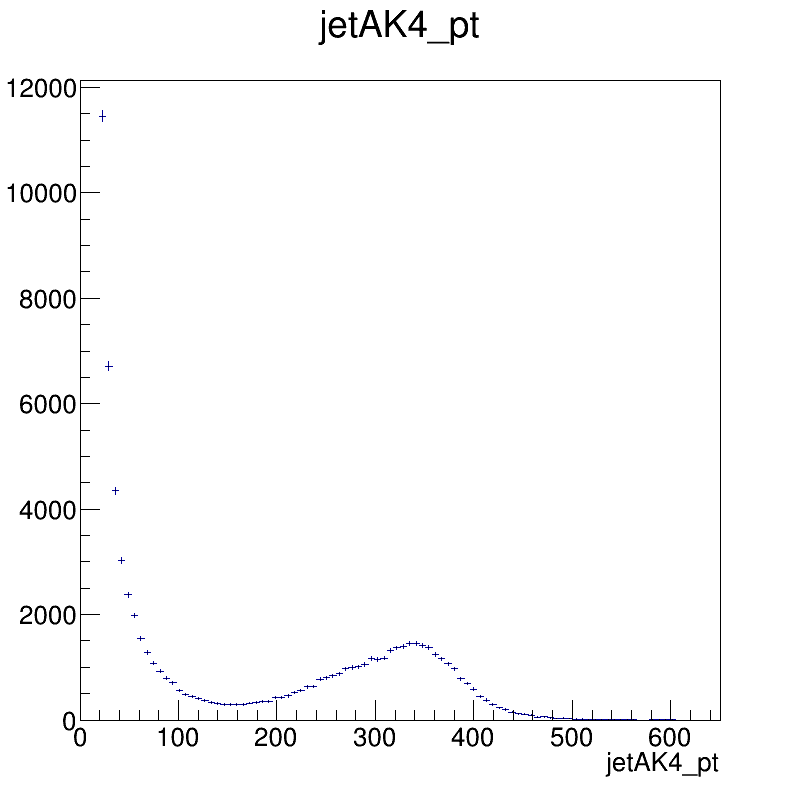

In [30]:
histo = hatsTree.Draw('jetAK4_pt')
# Required to show the plot inline in Jupyter
canvas.Draw()

Let's update this plot to be a bit prettier. First, we need to change a global ROOT option

In [21]:
import ROOT
ROOT.gStyle.SetOptStat(0)

Styling histograms in ROOT can be a significant pain and waste of time. `Rootpy` tries to simplify the whole process by providing simple access to all the drawing parameters. Additionally, it extends the definition to matplotlib-compatible markers, lines and colors. **Web colors (hexadecimal format) are also available!**

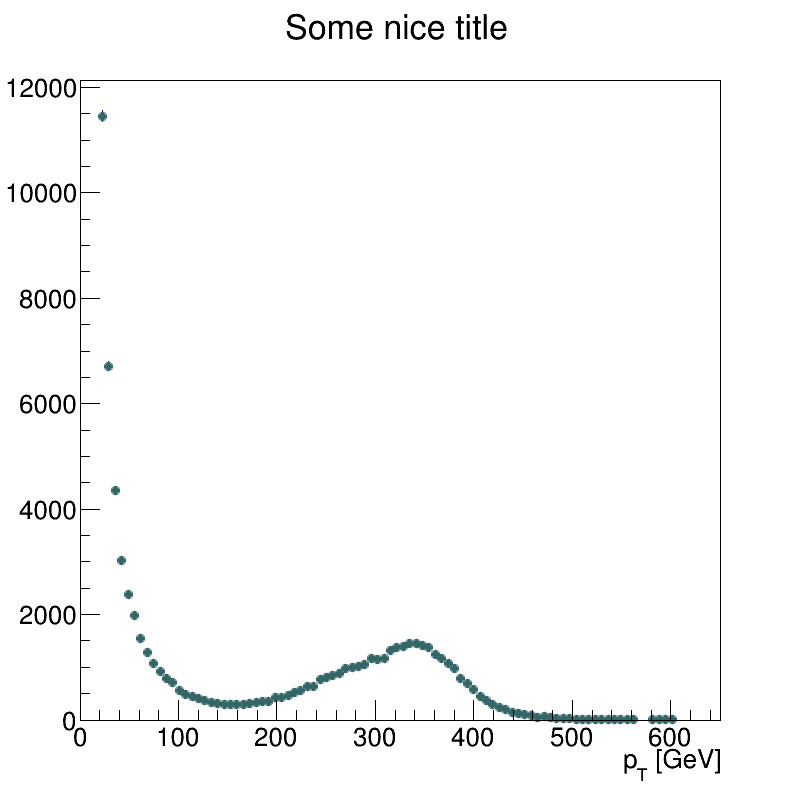

In [22]:
histo.markersize = 1
histo.markerstyle = 20
histo.markercolor = '#336666' #supports matplotlib, hex and ROOT colors!
histo.xaxis.title = 'p_{T} [GeV]'
histo.yaxis.title = 'Entries'
histo.title = 'Some nice title'
histo.Draw()
canvas.Draw()

Histograms are iterable in `rootpy`. This means you can loop over the bins like you would loop over a list
```python
for hbin in histogram:
  #do things
  pass
```

Each bins contains information about the position (accesses through .x, .y, .z), value, error, and if it's an overflow. The content can be accessessed and written, making bin-by-bin calculations way easier.

In [23]:
maxbin = max(histo, key = lambda x: x.value) #the histogram is iterable
print 'Maximum bin information:'
print '  # entries:     ', maxbin.value
print '  uncertainty:   ', maxbin.error
print '  x value:       ', maxbin.x.center
print '  x bin low edge:', maxbin.x.low

Maximum bin information:
  # entries:      11456.0
  uncertainty:    107.032705282
  x value:        22.75
  x bin low edge: 19.5
